### Loading the given data.
I have changed the name of the dataset for the easy access.

## EDA of the dataset

In [13]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# This imports were for plotting and proper visualization using retina feature
%matplotlib inline
%config InlineBackend.figure_format='retina'

#Load the data
df = pd.read_csv('./cardata.csv')

#View the data
df.head()

#Basic information
df.info()

#Describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


,Price,Year,Mileage
count,500000.000000,500000.000000,5.000000e+05
mean,21144.186304,2013.197174,5.507643e+04
std,10753.259704,3.290135,4.089704e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.585500e+04
50%,18450.000000,2014.000000,4.299000e+04
75%,26998.000000,2016.000000,7.740600e+04
max,79999.000000,2018.000000,2.457832e+06


In [14]:
# Checking for the duplicate data
df.duplicated().sum()

220

In [15]:
# Removing the duplicates
df.drop_duplicates(inplace= True)

# No of samples after removing the duplicates
print(df.size)

# Find null values
print(df.isnull().sum())
# No null values, no row needed to be droped or replaced with 0.

#Datatypes
df.dtypes


2998680
Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64


Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [16]:
#Correlation
df_dummy = df.drop(columns=['State', 'Model', 'Make'])
df_dummy.corr

<bound method DataFrame.corr of         Price  Year  Mileage
0       21490  2014    31909
1       21250  2016    25741
2       20925  2016    24633
3       14500  2012    84026
4       32488  2013    22816
...       ...   ...      ...
499995  16997  2013    40393
499996  11990  2012    91794
499997  49991  2014    39107
499998  21888  2010    62556
499999  63973  2017    17653

[499780 rows x 3 columns]>

In [17]:
# Column names
print(df.columns)

# No of samples
print("No of samples ", df.size)

# No of unqiue car models
print("No of unqiue car models, ", len(pd.unique(df['Model'])))
      
# No of states
print("No of unqiue States, ", len(pd.unique(df['State'])))

# No of unqiue years
print("No of unqiue Years, ", len(pd.unique(df['Year'])))

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')
No of samples  2998680
No of unqiue car models,  525
No of unqiue States,  51
No of unqiue Years,  22


In [18]:
# using one hot encoding to convert the categorical data.

one_hot_data = pd.get_dummies(df[['State', 'Make', 'Model']])
df.drop(columns=['State', 'Make', 'Model'], inplace= True)
final_data = pd.concat([one_hot_data, df], axis='columns')
df = final_data

In [19]:
# df contains the X and y, spliting that
X = df.drop(['Price'], axis=1).reset_index(drop=True)
y = df['Price']


# split the data into test and training 75 percent training and 25 percent test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [20]:
from tqdm import tqdm

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

regr_1 = DecisionTreeRegressor(max_depth=40)

regr_1.fit(X_train, y_train)
y_1 = regr_1.predict(X_test)

# use mse to calculate the error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_1)


29661957.399096183

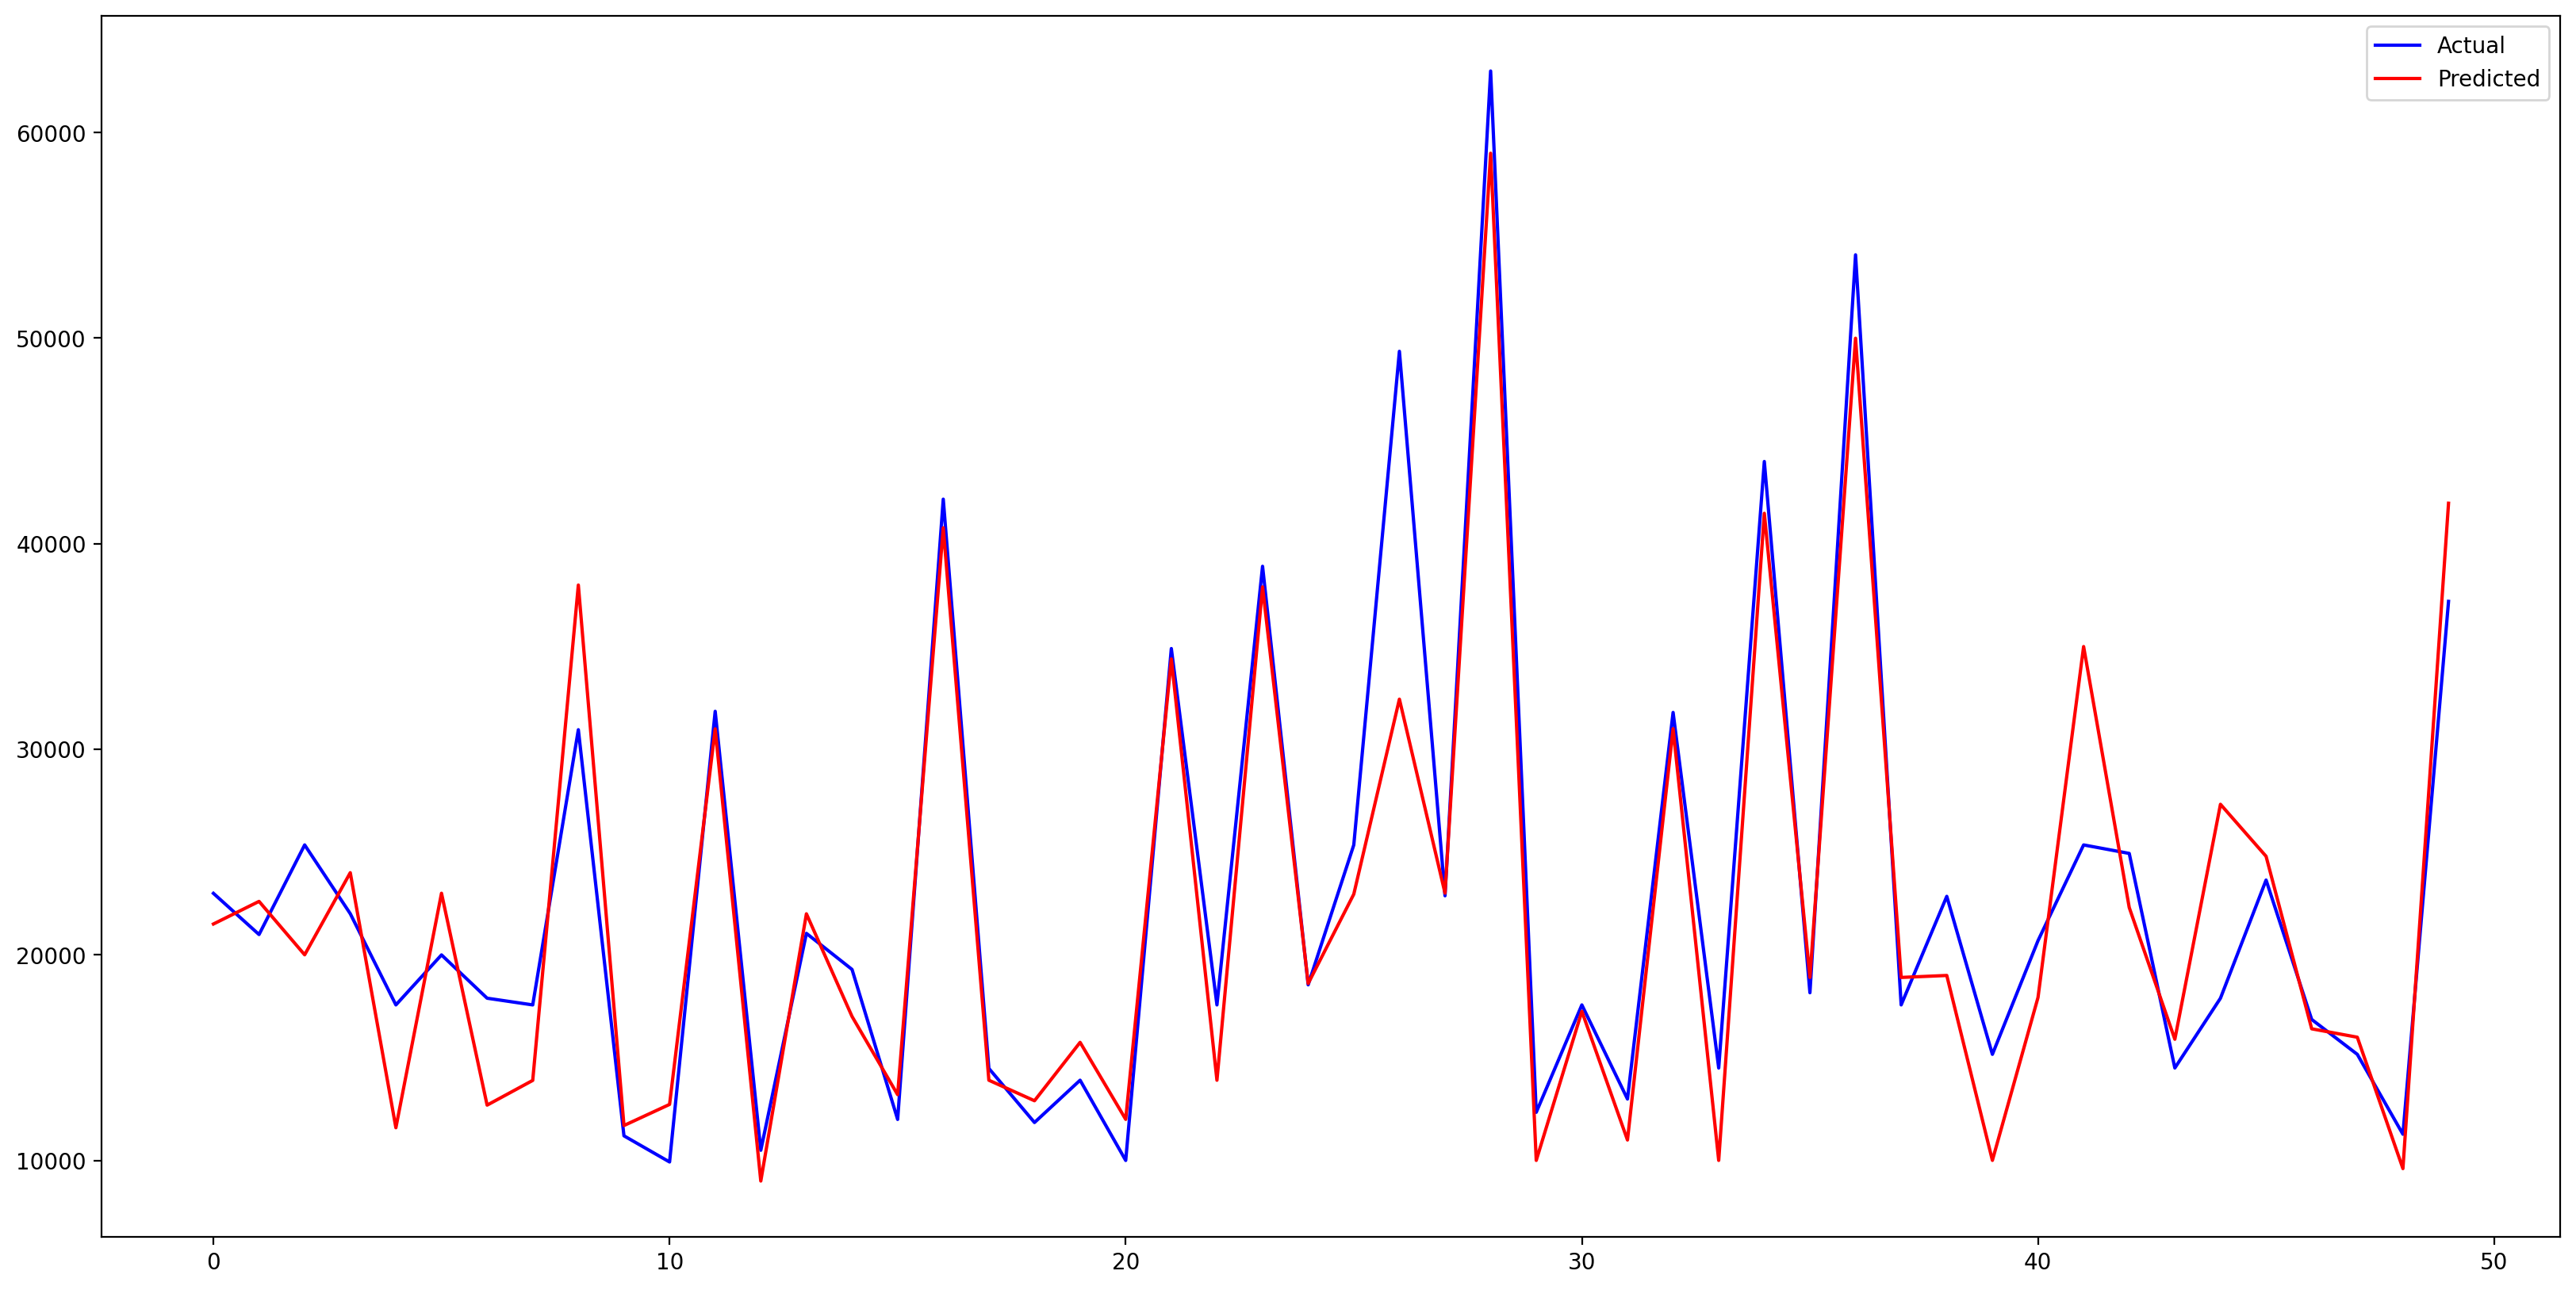

In [21]:
import matplotlib.pyplot as plt

# give colors to the graphs
plt.figure(figsize=(20,10))
plt.plot(y_1[:50], c = 'b')
plt.plot(y_test[:50], c = 'r')

# give legend to the graph
plt.legend(["Actual", "Predicted"])
plt.show()

In [22]:
# use mse to calculate the error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_1)

29661957.399096183

In [24]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(regr_1, X, y, cv=10)
print('Cross-validation scores: ', dt_cv_scores)
print('Mean CV score: ', np.mean(dt_cv_scores))

Cross-validation scores:  [0.73970836 0.74281453 0.74666126 0.74912088 0.74708198 0.74545522
 0.74028108 0.74380159 0.74217403 0.73839042]
Mean CV score:  0.743548935034897
